In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [244]:
input_dir = '.\\out\\'

data_input = "cleaned_world_bank_data.pkl"
data = pd.read_pickle(input_dir + data_input)

data_train_regressors_file = "train_regressors_data.pkl"
data_train_regressors = pd.read_pickle(input_dir + data_train_regressors_file)

data_train_targets_file = "train_targets_data.pkl"
data_train_targets = pd.read_pickle(input_dir + data_train_targets_file)

data_test_regressors_file = "test_regressors_data.pkl"
data_test_regressors = pd.read_pickle(input_dir + data_test_regressors_file)

data_test_targets_file = "test_targets_data.pkl"
data_test_targets = pd.read_pickle(input_dir + data_test_targets_file)

In [158]:
data.head(5)

SI.POV.DDAY  SI.POV.GINI  EN.POP.SLUM.UR.ZS  SI.SPR.PC40  \
country     year                                                             
Afghanistan 1972          NaN          NaN               62.7          NaN   
            1973          NaN          NaN               62.7          NaN   
            1974          NaN          NaN               62.7          NaN   
            1975          NaN          NaN               62.7          NaN   
            1976          NaN          NaN               62.7          NaN   

                  SE.PRM.UNER  SE.XPD.TOTL.GD.ZS  SL.TLF.TOTL.IN  \
country     year                                                   
Afghanistan 1972    1426190.0            1.11718       4034624.0   
            1973    1426190.0            1.42788       4034624.0   
            1974    1426190.0            1.42788       4034624.0   
            1975    1426190.0            1.30332       4034624.0   
            1976    1426190.0            1.30332       4034624.0   

                  NY.GDP.MKTP.KD.ZG  SP.URB.TOTL.IN.ZS  
country     year                                        
Afghanistan 1972           8.832278             12.410  
            1973           8.832278             12.809  
            1974           8.832278             13.219  
            1975           8.832278             13.641  
            1976           8.832278             14.074

In [209]:
#Create a list of coutries to be plotted in the summary plot below
regions = list(data.index.levels[0])[:50]

### Multicountry plot across all 9 independent variables and the dependent variable (SI.POV.DDAY)

The following plot is a quick illustration of the state of data in across multiple coutries.

One thing that it clearly shows is that there is a strong correlation of location of missing values for many of the variables. However for some others, such as SI.POV.DDAY and SI.POV.GINI this is less the case. 

Secondly, it is clear that we will need a model that is robust to missing values.

A key question here is if these patterns help us know if we have to model each country seperately or if one model fits all. Is there a method that can help us to work this out? Maybe there is a middle ground of number of models (for example a different model for every continent.

There are a number of outlier countries that could be investigated as well. For example, in SE.PRM.UNER. What should be done with these? How should our respond to these outliers?

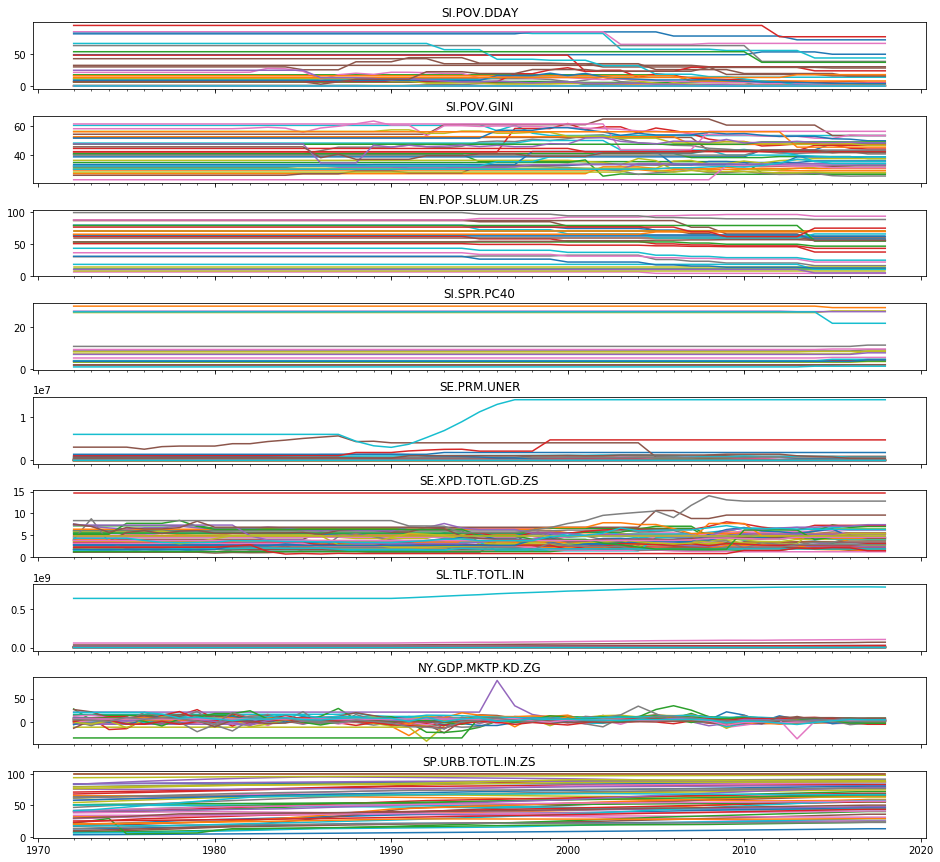

In [77]:
#pyplot.figure(figsize=(16, 20))
inputs = list(data.columns)

fig, axes = plt.subplots(len(inputs), 1, sharex=True ,figsize=(16, 15))

for i in range(len(inputs)):
    axes[i].set_xticks(list(range(1972,2018)), minor=True)
    axes[i].set_title(inputs[i])
    #ax.set_yticklabels([])
    column = inputs[i]
    for country in regions:
        values = data.loc[country][column].values
        axes[i].plot( list(range(1972,2019)), values)
plt.subplots_adjust(wspace=0, hspace=0.4)
#fig.invert_xaxis()
#pyplot.show()

### Dealing with Missing Values

In [245]:
#For Training, only consider windows that don't have a missing target as they offer nothing to training
#Therefore, remove those observations from both the training regressors and targets datasets.
data_train_regressors_subset = data_train_regressors[~np.isnan(list(data_train_targets.values.flatten()))]
data_train_targets_subset = data_train_targets[~np.isnan(list(data_train_targets.values.flatten()))]

#For testing, also remove windows with no target variable as it is impossible to measure preformance.
data_test_regressors_subset = data_test_regressors[~np.isnan(list(data_test_targets.values.flatten()))]
data_test_targets_subset = data_test_targets[~np.isnan(list(data_test_targets.values.flatten()))]


In [246]:
#get rid of EN.POP.SLUM.UR.ZS and SI.SPR.PC40 since they have so many missing values
#This needs to be removed from both the train and test regressors file
data_train_regressors_subset = data_train_regressors_subset.drop(['EN.POP.SLUM.UR.ZS', 'SI.SPR.PC40'], axis=1)
data_test_regressors_subset = data_test_regressors_subset.drop(['EN.POP.SLUM.UR.ZS', 'SI.SPR.PC40'], axis=1)

In [212]:
#TEMP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
get_rid_of = ['SI.POV.GINI','SE.PRM.UNER','SE.XPD.TOTL.GD.ZS','SL.TLF.TOTL.IN','NY.GDP.MKTP.KD.ZG','SP.URB.TOTL.IN.ZS']
data_train_regressors_subset = data_train_regressors_subset.drop(get_rid_of, axis=1)
data_test_regressors_subset = data_test_regressors_subset.drop(get_rid_of, axis=1)

In [247]:
data_train_regressors_subset.shape

(471, 35)

In [248]:
data_test_regressors_subset.isna().sum()

                   lag
SI.POV.DDAY        1      2
                   2      2
                   3      2
                   4      2
                   5      2
SI.POV.GINI        1      0
                   2      0
                   3      0
                   4      0
                   5      0
SE.PRM.UNER        1      3
                   2      3
                   3      3
                   4      3
                   5      3
SE.XPD.TOTL.GD.ZS  1      2
                   2      2
                   3      2
                   4      2
                   5      2
SL.TLF.TOTL.IN     1      2
                   2      2
                   3      2
                   4      2
                   5      2
NY.GDP.MKTP.KD.ZG  1      0
                   2      0
                   3      0
                   4      0
                   5      0
SP.URB.TOTL.IN.ZS  1      1
                   2      1
                   3      1
                   4      1
                   5     

In [249]:
#Have a look at what countries are still missing data for SE.PRM.UNER
missing_boolean = np.isnan(data_train_regressors_subset[('SE.PRM.UNER',1)].values)
data_train_regressors_subset.loc[missing_boolean, ('SE.PRM.UNER', 1)]

country                 window
Bosnia and Herzegovina  1        NaN
                        2        NaN
                        3        NaN
Czech Republic          1        NaN
                        2        NaN
                        3        NaN
Kosovo                  1        NaN
                        2        NaN
                        3        NaN
Slovakia                1        NaN
                        2        NaN
                        3        NaN
Turkmenistan            1        NaN
                        2        NaN
                        3        NaN
Name: (SE.PRM.UNER, 1), dtype: float64

In [54]:
#Trying to get this to work
#data_train_regressors_subset.fillna(pd.Series(data_train_regressors_subset.mean().values),inplace=True)


In [250]:
#Tempory measure
data_train_regressors_subset.fillna(0,inplace=True)
data_test_regressors_subset.fillna(0,inplace=True)

In [251]:
data_train_regressors_subset.shape

(471, 35)

In [252]:
data_test_regressors_subset.shape

(85, 35)

### Prediction 

In [204]:
data_test_targets.loc['Malawi']

SI.POV.DDAY    71.7
Name: Malawi, dtype: object

In [207]:
data_test_regressors_subset.loc['Malawi']

             lag
SI.POV.DDAY  1      0.0
             2      0.0
             3      0.0
             4      0.0
             5      0.0
Name: Malawi, dtype: float64

In [253]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(data_train_regressors_subset,data_train_targets_subset)
#Make predictions
predictions = model_linear.predict(data_test_regressors_subset)

In [254]:
#Refactor predictions to faciliate comparison later with the True values

#Convert to dataframe with coutry names as index
predictions_df = pd.DataFrame(predictions.flatten(), index=data_test_regressors_subset.index, columns=['SI.POV.DDAY'])
#Reindex in order to put back in the coutries that were removed due to lack of target.
predictions_df = predictions_df.reindex(data_test_targets.index)

In [265]:
#forcing to ignore these 2 countries as they were not preidcted by the naive predictor and we want to compare
#the performance
ignore = ['Vanuatu','Tuvalu']
mse_result,no_true_value,countries_not_predicted = mse_countries(data_test_targets, predictions_df, ignore)

In [266]:
mse_result

21.599340940906426

In [267]:
countries_not_predicted

{'Tuvalu', 'Vanuatu'}

In [194]:
print(predictions_df.loc['Thailand'])
print(data_test_targets.loc['Thailand'])

SI.POV.DDAY    3.974716
Name: Thailand, dtype: float64
SI.POV.DDAY    0.1
Name: Thailand, dtype: object


In [200]:
print(predictions_df.loc['Malawi'])
print(data_test_targets.loc['Malawi'])

SI.POV.DDAY    4.029352
Name: Malawi, dtype: float64
SI.POV.DDAY    71.7
Name: Malawi, dtype: object


In [263]:
((predictions_df - data_test_targets)**2).sort_values(by='SI.POV.DDAY',ascending=False)

,SI.POV.DDAY
Nepal,910.909
Gambia,377.105
Vanuatu,202.108
Guinea-Bissau,195.387
Vietnam,78.2639
Madagascar,59.9646
Bangladesh,33.3944
Pakistan,25.237
Rwanda,23.3356
Zambia,22.7845


In [260]:

def mse_countries(true_data, predictions_data, ignore_countries = None):  
    """
    Calculates MSE of country and returns meta data on missing true values and predictions 

    Args:
        true_data: dataframe of  true_data
        predictions_data: dataframe of prediction data for comparing with true_data. Needs to be the..
                          dimension as true_data.
        ignore_countries: Countries to have their predictions ignored. Their predictions are set to NaN
    
    Returns:
        mse: Mean Squared Eror value
        countries_no_true_value: list of countries with no true value
        countries_no_prediction: list of coutries that have a true value bit no prediction
    """
    predictions_data_local = predictions_data.copy()
    
    assert(true_data.shape == predictions_data_local.shape), "Input dataframes need to have same dimensions"
    
    if ignore_countries is not None:
        predictions_data_local.loc[ignore_countries] = np.NaN
    
    mse = np.nanmean((predictions_data_local - true_data)**2)
    countries_no_true_value = list(true_data[true_data.isna().values].index)
    countries_with_true_value = list(true_data[~true_data.isna().values].index)
    total_countries_with_no_prediction = list(predictions_data_local[predictions_data_local.isna().values].index)
    #What we are interested in is countries that have real values but no predictions.
    countries_no_prediction =  set(countries_with_true_value) & set(total_countries_with_no_prediction)
    countries_predicted = set(countries_with_true_value)
    return mse, countries_no_true_value, countries_no_prediction

In [242]:
len(no_true_value)

131

In [243]:
countries_not_predicted

set()